Importando as bibliotecas

In [22]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 2.1 MB/s eta 0:00:00a 0:00:01


### Gerando um conjunto de dados simulado

In [3]:
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000) # Distribuição normal com média 50 e desvio padrão 10
df = pd.DataFrame(data, columns=['Valores'])

#### Frequência

-   **Definição**: A frequência de um valor num conjunto de dados refere-se ao número de vezes que esse valor aparece.
-   **Tipos**:
    -   Frequência Absoluta: Número exato de ocorrências de um valor.
    -   Frequência Relativa: Proporção da frequência absoluta em relação ao tamanho total do conjunto de dados.

In [6]:
frequencias = df['Valores'].value_counts().sort_index()
frequencias

Valores
17.587327    1
23.031134    1
23.490302    1
23.802549    1
25.283555    1
            ..
75.733598    1
76.323821    1
77.201692    1
80.788808    1
88.527315    1
Name: count, Length: 1000, dtype: int64

**Percentis** são medidas que dividem o conjunto de dados em 100 partes iguais, ajudando a entender a distribuição dos dados. O percentil 50, por exemplo, é a mesma coisa que a mediana, pois divide os dados em duas partes iguais. Percentis são particularmente úteis para identificar outliers e entender a dispersão dos dados de uma maneira mais granular.

In [20]:
percentis = np.percentile(df['Valores'], [25, 50, 75])
p25, p50, p75 = percentis

print(f"Percentil 25: {p25}")
print(f"Percentil 50 (Mediana): {p50}")
print(f"Percentil 75: {p75}")

Percentil 25: 43.524096945376485
Percentil 50 (Mediana): 50.25300612234888
Percentil 75: 56.4794387547293


Visualizando a distribuição com um boxplot

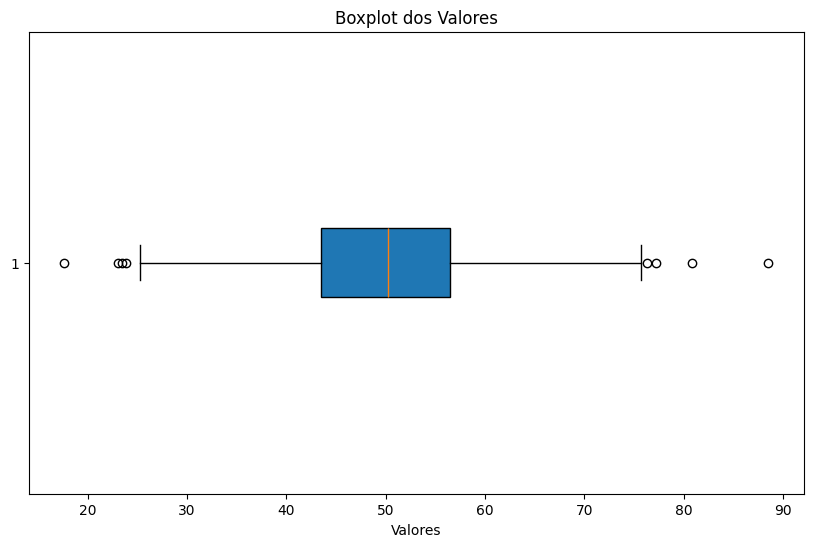

In [24]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Valores'], vert=False, patch_artist=True)
plt.title('Boxplot dos Valores')
plt.xlabel('Valores')
plt.show()

#### Tendência Central

-   **Definição**: Medidas de tendência central indicam o ponto central ou valor típico de um conjunto de dados.
-   **Principais Medidas**:
    -   Média: Soma de todos os valores dividida pelo número de valores.
    -   Mediana: Valor que divide o conjunto de dados ao meio quando organizado em ordem.
    -   Moda: Valor(es) que aparece(m) com maior frequência no conjunto de dados.

In [7]:
media = df['Valores'].mean()
mediana = df['Valores'].median()
moda = df['Valores'].mode()[0]

In [15]:
print(f"A media é {media:.2f}, a mediana é {mediana:.2f} e a moda é {moda:.2f}")

A media é 50.19, a mediana é 50.25 e a moda é 17.59


#### Dispersão

-   **Definição**: Medidas de dispersão indicam quão espalhados estão os valores em relação à uma medida de tendência central.
-   **Principais Medidas**:
    -   Amplitude: Diferença entre os valores máximo e mínimo.
    -   Variância: Média dos quadrados das diferenças entre cada valor e a média.
    -   Desvio Padrão: Raiz quadrada da variância, indicando a dispersão dos dados em torno da média.

In [16]:
amplitude = df['Valores'].max() - df['Valores'].min()
variancia = df['Valores'].var()
desvio_padrao = df['Valores'].std()


In [18]:
print(f"A amplitude é {amplitude:.2f} a variância é {variancia:.2f} e o desvio padrão é {desvio_padrao:.2f}")

A amplitude é 70.94 a variância é 95.89 e o desvio padrão é 9.79


#### Distribuição

-   **Definição**: A distribuição de um conjunto de dados descreve a frequência dos diferentes valores ou intervalos de valores.
-   **Tipos**:
    -   Distribuição Normal: Conhecida como curva de sino, onde a maioria dos valores se concentra em torno da média.
    -   Distribuição Binomial: Descreve o número de sucessos em uma série de ensaios independentes.
    -   Outras: Poisson, exponencial, etc.

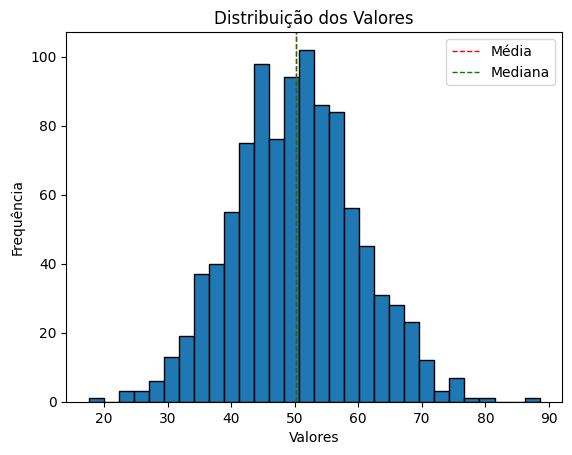

In [19]:
plt.hist(df['Valores'], bins=30, edgecolor='black')
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label='Média')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.legend()
plt.title('Distribuição dos Valores')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

#### Refinando a Visualização da Distribuição

Para melhorar nossa visualização da distribuição dos dados, podemos combinar histogramas e densidade de probabilidade para uma visão mais completa.

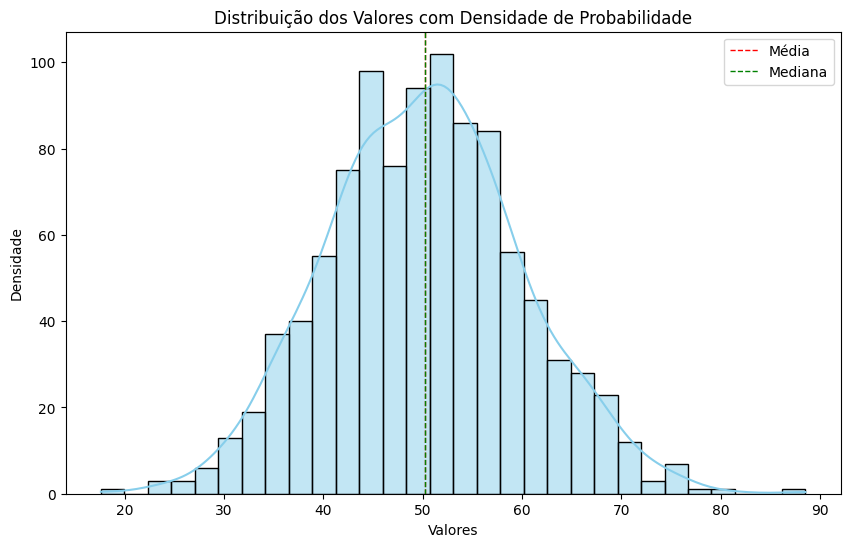

In [26]:
# Histograma com densidade de probabilidade
plt.figure(figsize=(10, 6))
sns.histplot(df['Valores'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label='Média')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.legend()
plt.title('Distribuição dos Valores com Densidade de Probabilidade')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()